In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("../input"))

['OutputRecommendation1.txt']


In [2]:
df = pd.read_csv('../input/OutputRecommendation1.txt')
df.head()

Id        ASIN    ...    totalReviews avgRating
0   1  0827229534    ...               2       5.0
1   2  0738700797    ...              12       4.5
2   4  0842328327    ...               1       4.0
3   5  1577943082    ...               0       0.0
4   6  0486220125    ...              17       4.0

[5 rows x 9 columns]

In [3]:
df['group'].unique()

array(['Book', 'Music', 'DVD', 'Video', 'Toy', 'Software', 'Baby Product',
       'Sports'], dtype=object)

In [4]:
dfDVD = df.loc[ df['group'] == 'DVD']
dfDVD

Id        ASIN    ...    totalReviews avgRating
16          21  0790747324    ...             140       4.5
29          37  B000056PNC    ...               7       3.5
32          42  B000056PNB    ...              24       4.5
34          44  B000056PNE    ...              13       4.0
108        149  B00000IC80    ...               0       0.0
109        151  B00000IC82    ...              13       3.0
110        153  B00000IC83    ...               8       4.0
113        158  B00000IC89    ...               4       3.0
126        176  B00000IC8Z    ...              15       5.0
129        179  B00000IC8F    ...              13       3.5
132        182  B00000IC8L    ...              15       1.5
147        211  B00007L4N1    ...               6       5.0
209        312  B00006LU75    ...               5       3.0
235        349  B00004U0FN    ...               7       4.0
357        514  B000050X30    ...              17       3.0
358        515  B000050X32    ...               4       5.0
363        522  B000050X31    ...              30       4.5
455        653  B00004RFI7    ...              28       5.0
466        672  6305908028    ...               6       4.5
474        686  B00004RFIF    ...              51       4.5
477        689  B00004RFIE    ...              81       4.5
478        690  B00004RFIC    ...               7       4.5
518        746  6305808155    ...              18       3.0
556        802  B00005YTR7    ...               2       3.5
560        806  B00005YTR8    ...              11       5.0
586        843  B00000INBI    ...               5       2.0
593        856  B00000IC81    ...              15       1.5
701       1002  B000063JZW    ...               2       2.5
727       1049  B000063JZG    ...              10       4.5
733       1057  B000063JZE    ...              29       4.5
...        ...         ...    ...             ...       ...
363277  548413  6305742367    ...              49       3.5
363278  548414  6305325820    ...               6       5.0
363279  548415  B00005QAP4    ...               7       2.5
363282  548418  B000051S6M    ...               3       3.0
363289  548425  6305077789    ...               7       4.0
363294  548431  B00007ELF7    ...              50       3.0
363296  548433  6305750254    ...               7       4.0
363298  548435  B000087F0X    ...              17       4.5
363299  548436  B00005RYL7    ...              56       4.0
363301  548438  B000069HY7    ...              18       3.5
363302  548439  0784012822    ...              20       3.5
363303  548440  B000059H84    ...               3       4.5
363304  548441  B00005K3OG    ...              13       4.0
363305  548442  6305944288    ...              28       4.0
363306  548445  B00004Y7H7    ...               2       4.5
363307  548446  B00005RI9E    ...               7       4.0
363308  548447  B00005M2CO    ...              43       4.0
363309  548448  B00005M2C2    ...              19       3.5
363310  548449  B00008O38G    ...              12       4.0
363311  548450  B000069HYW    ...              11       4.5
363312  548452  B00003ES2M    ...              82       4.0
363314  548454  0790742004    ...              17       4.0
363315  548455  6305340536    ...               3       5.0
363316  548456  630522207X    ...              65       4.0
363318  548458  B000063UR2    ...             356       4.0
363319  548459  B00007BG8E    ...             102       3.0
363320  548460  B00007G1UZ    ...              31       4.5
363388  548547  B000059TOC    ...               1       5.0
363389  548548  B00006JBIX    ...               8       3.0
363391  548550  B00008DDST    ...               3       5.0

[17628 rows x 9 columns]

In [5]:
dfDVD.iloc[0]['ASIN']

'0790747324'

In [6]:
import networkx as nx
G = nx.Graph()
G

In [7]:
#Adding nodes in the graph
for i in range(dfDVD.shape[0]):
    G.add_node(dfDVD.iloc[i]['ASIN'])
G.number_of_nodes()

17628

In [8]:
Glist = list(G)
len(Glist)

17628

In [9]:
#Adding edges and edge_weight to the graph
#Finding similarity
from tqdm import tqdm
for i in tqdm(range(len(Glist))):
    cat_i = dfDVD.iloc[i]['categories'].split(' ')
    for coASIN in dfDVD.iloc[i]['copurchased'].split(' '):
        jaccard_similarity = 0
        cat_j_row = dfDVD.loc[ dfDVD['ASIN'] == coASIN ]
        cat_j = cat_j_row['categories'].to_string().split(' ')[1:]
        if i<2:
            print(coASIN)
            print(cat_j)
        cat_iUcat_j = set(cat_i).union(set(cat_j))
        cat_iIcat_j = set(cat_i).intersection(set(cat_j))
        if len(cat_iUcat_j)>0:
            jaccard_similarity = round( len(cat_iIcat_j)/len(cat_iUcat_j) , 2)
        #G.add_edge(Glist[i], coASIN)
        G.add_edge(Glist[i], coASIN, weight= jaccard_similarity)

  0%|          | 22/17628 [00:00<04:23, 66.90it/s]

B00007JMD8
['', '', '', '', 'DVD', 'Genres', 'Science', 'Fiction', '&', 'Fantasy', 'General']
6305350221
['', '', '', '', 'DVD', 'Genres', 'Science', 'Fiction', '&', 'Fantasy', 'Sci-Fi', 'A...']
B00004RF9B
['', '', '', '', 'DVD', 'Genres', 'Science', 'Fiction', '&', 'Fantasy', 'Sci-Fi', 'A...']
B00005JKFR
['', '', '', '', 'DVD', 'Genres', 'Science', 'Fiction', '&', 'Fantasy', 'General']
B00005NG6A
['', '', '', '', 'DVD', 'Genres', 'Science', 'Fiction', '&', 'Fantasy', 'General']
B00020W0WO
[')']
B0000C8AO7
[')']
B0002WZRUO
[')']
B0000C8AO5
[')']
B0001WTVUC
[')']


100%|██████████| 17628/17628 [04:28<00:00, 65.56it/s]


### Iteration speeds increased 10 times if we use iloc instead of treating it as array.

In [16]:
G.edges(data=True)

EdgeDataView([('0790747324', 'B00007JMD8', {'weight': 0.44}), ('0790747324', '6305350221', {'weight': 0.27}), ('0790747324', 'B00004RF9B', {'weight': 0.27}), ('0790747324', 'B00005JKFR', {'weight': 0.44}), ('0790747324', 'B00005NG6A', {'weight': 0.44}), ('0790747324', 'B00005JL98', {'weight': 0.44}), ('0790747324', 'B00004W21Q', {'weight': 0.27}), ('0790747324', 'B00005JKLZ', {'weight': 0.27}), ('0790747324', 'B00005Y6XR', {'weight': 0.27}), ('0790747324', '0790746115', {'weight': 0.44}), ('0790747324', 'B00006JDRG', {'weight': 0.3}), ('B000056PNC', 'B00020W0WO', {'weight': 0.0}), ('B000056PNC', 'B0000C8AO7', {'weight': 0.0}), ('B000056PNC', 'B0002WZRUO', {'weight': 0.0}), ('B000056PNC', 'B0000C8AO5', {'weight': 0.0}), ('B000056PNC', 'B0001WTVUC', {'weight': 0.0}), ('B000056PNB', 'B0002LJTIG', {'weight': 0.0}), ('B000056PNB', 'B00004TJRE', {'weight': 1.0}), ('B000056PNB', 'B0001K2S36', {'weight': 0.0}), ('B000056PNB', 'B0000DIJON', {'weight': 0.0}), ('B000056PNB', 'B00006LPHE', {'weigh

In [10]:
len(G.edges)

76209

In [11]:
len(G.nodes)

30444

In [12]:
dc = nx.degree(G)
dc

DegreeView({'0790747324': 11, 'B000056PNC': 5, 'B000056PNB': 9, 'B000056PNE': 5, 'B00000IC80': 3, 'B00000IC82': 1, 'B00000IC83': 8, 'B00000IC89': 5, 'B00000IC8Z': 8, 'B00000IC8F': 5, 'B00000IC8L': 5, 'B00007L4N1': 4, 'B00006LU75': 5, 'B00004U0FN': 6, 'B000050X30': 6, 'B000050X32': 5, 'B000050X31': 20, 'B00004RFI7': 5, '6305908028': 8, 'B00004RFIF': 10, 'B00004RFIE': 6, 'B00004RFIC': 5, '6305808155': 5, 'B00005YTR7': 7, 'B00005YTR8': 5, 'B00000INBI': 7, 'B00000IC81': 5, 'B000063JZW': 1, 'B000063JZG': 5, 'B000063JZE': 8, 'B000063JZI': 5, 'B000056PPH': 5, 'B000056N8X': 9, 'B000056N8Z': 6, 'B000056N8P': 5, 'B000056N8W': 5, 'B000056N8T': 8, 'B000056N8Q': 9, 'B000056N8V': 10, 'B000056N8H': 7, '0790742853': 7, 'B00006RJER': 5, 'B00005O438': 6, 'B00004I9Z1': 5, 'B00005RT35': 6, 'B00005ALLX': 5, 'B00008WJDN': 5, 'B00008WJDS': 5, 'B00008WJDA': 7, 'B00005NB96': 5, 'B00005NB97': 5, 'B00005NB95': 5, 'B00005NB92': 10, 'B00005NB94': 12, 'B00005NB90': 6, 'B00005NB91': 9, 'B00005NB93': 6, 'B00006DXXV':

# Visualizations

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


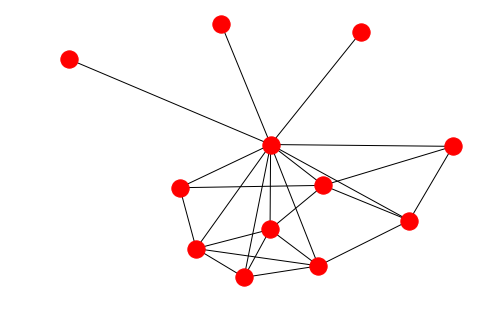

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

egoGraphNode0 = nx.ego_graph(G,Glist[0],radius=1)
# write edgelist to grid.edgelist
nx.write_edgelist(egoGraphNode0, path="grid.edgelist", delimiter=" ")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=" ")

nx.draw(H)
plt.show()

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


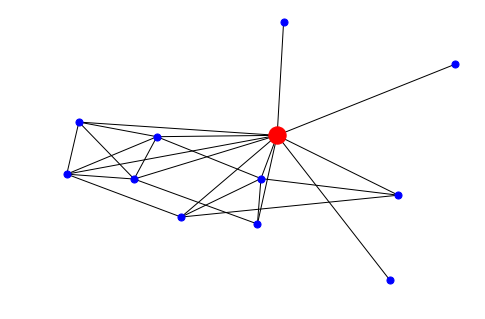

In [32]:
from operator import itemgetter
node_and_degree = egoGraphNode0.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
# Create ego graph of main hub
hub_ego = nx.ego_graph(egoGraphNode0, largest_hub)
# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


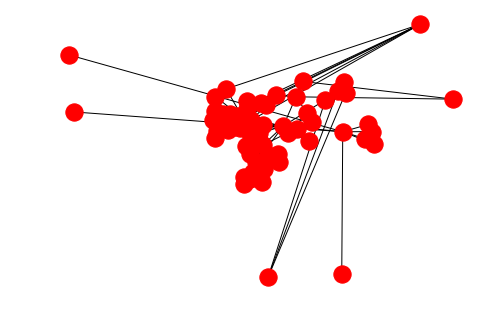

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

egoGraphNode02 = nx.ego_graph(G,Glist[0],radius=2)
# write edgelist to grid.edgelist
nx.write_edgelist(egoGraphNode02, path="grid.edgelist", delimiter=" ")
# read edgelist from grid.edgelist
H02 = nx.read_edgelist(path="grid.edgelist", delimiter=" ")

nx.draw(H02)
plt.show()

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


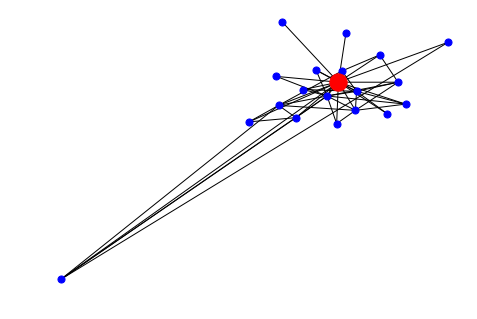

In [34]:
from operator import itemgetter
node_and_degree = egoGraphNode02.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
# Create ego graph of main hub
hub_ego = nx.ego_graph(egoGraphNode02, largest_hub)
# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


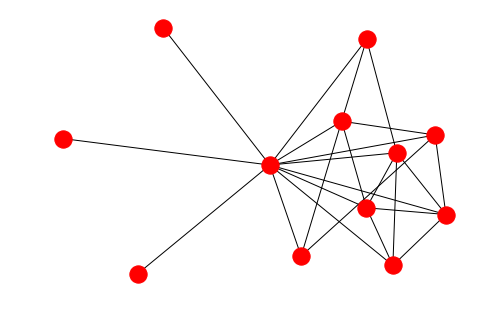

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

egoGraphNode1 = nx.ego_graph(G,Glist[1],radius=1)
# write edgelist to grid.edgelist
nx.write_edgelist(egoGraphNode0, path="grid.edgelist", delimiter=" ")
# read edgelist from grid.edgelist
H1 = nx.read_edgelist(path="grid.edgelist", delimiter=" ")

nx.draw(H1)
plt.show()

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


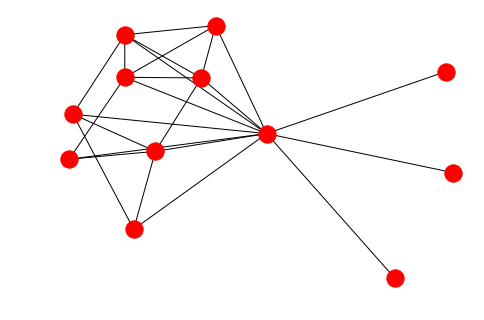

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

egoGraphNode2 = nx.ego_graph(G,Glist[2],radius=1)
# write edgelist to grid.edgelist
nx.write_edgelist(egoGraphNode0, path="grid.edgelist", delimiter=" ")
# read edgelist from grid.edgelist
H2 = nx.read_edgelist(path="grid.edgelist", delimiter=" ")

nx.draw(H2)
plt.show()

In [37]:
#Adding new column clusteringCoeff
clusteringCoeff = []
for i in range(len(Glist)):
    egoGraph = nx.ego_graph(G,Glist[i],radius=1)
    clusteringCoeff.append(round(nx.average_clustering(egoGraph),2))
clusteringCoeff

[0.51,
 0.0,
 0.31,
 0.0,
 0.0,
 0.0,
 0.76,
 0.48,
 0.75,
 0.8,
 0.63,
 0.43,
 0.8,
 0.55,
 0.84,
 0.84,
 0.65,
 0.8,
 0.9,
 0.84,
 0.95,
 0.9,
 0.51,
 0.64,
 0.77,
 0.73,
 0.63,
 0.0,
 0.0,
 0.73,
 0.0,
 0.63,
 0.8,
 0.3,
 0.48,
 0.81,
 0.72,
 0.72,
 0.66,
 0.6,
 0.0,
 0.81,
 0.8,
 0.0,
 0.85,
 0.85,
 0.0,
 0.8,
 0.79,
 0.35,
 0.61,
 0.84,
 0.69,
 0.71,
 0.71,
 0.74,
 0.77,
 1.0,
 0.68,
 1.0,
 0.76,
 0.69,
 0.0,
 0.35,
 0.4,
 0.72,
 0.56,
 0.35,
 0.81,
 0.54,
 0.56,
 0.68,
 0.48,
 0.67,
 0.48,
 0.7,
 0.77,
 0.67,
 0.35,
 0.0,
 0.8,
 0.0,
 0.48,
 0.48,
 0.35,
 0.77,
 0.0,
 1.0,
 0.95,
 0.35,
 0.72,
 0.26,
 0.0,
 0.0,
 0.4,
 0.92,
 0.0,
 0.68,
 0.35,
 0.85,
 0.68,
 0.82,
 0.0,
 0.82,
 0.48,
 0.35,
 0.0,
 0.83,
 0.83,
 0.6,
 0.63,
 0.57,
 1.0,
 0.67,
 0.0,
 0.63,
 0.8,
 0.9,
 0.61,
 0.9,
 0.67,
 0.86,
 0.68,
 0.0,
 0.35,
 0.65,
 0.63,
 0.0,
 0.35,
 0.71,
 0.6,
 0.43,
 0.63,
 0.69,
 0.9,
 0.76,
 0.0,
 0.54,
 1.0,
 0.35,
 0.84,
 0.7,
 0.55,
 0.73,
 0.81,
 0.35,
 0.63,
 0.72,
 0.41,
 0.18,

In [38]:
dfDVD['CusteringCoeff'] = clusteringCoeff

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
dfDVD.head(10)

Id        ASIN      ...       avgRating CusteringCoeff
16    21  0790747324      ...             4.5           0.51
29    37  B000056PNC      ...             3.5           0.00
32    42  B000056PNB      ...             4.5           0.31
34    44  B000056PNE      ...             4.0           0.00
108  149  B00000IC80      ...             0.0           0.00
109  151  B00000IC82      ...             3.0           0.00
110  153  B00000IC83      ...             4.0           0.76
113  158  B00000IC89      ...             3.0           0.48
126  176  B00000IC8Z      ...             5.0           0.75
129  179  B00000IC8F      ...             3.5           0.80

[10 rows x 10 columns]

In [40]:
purchasedASIN = 'B00000IC8Z'
purchasedASINegoGraph = nx.ego_graph(G, purchasedASIN, radius=1)
purchasedASINegoGraph.edges

EdgeView([('B00000JMQJ', '0767018664'), ('B00000JMQJ', '0767018699'), ('B00000JMQJ', 'B00000JMQR'), ('B00000JMQJ', 'B00000IC8Z'), ('B00000JMQJ', '0767015533'), ('0767018664', 'B00000IC8Z'), ('0767018664', '0767018699'), ('0767018664', 'B00000JMQR'), ('0767018664', '0767015533'), ('0767018664', '630529996X'), ('630529996X', 'B00000IC8Z'), ('630529996X', '6305299951'), ('630529996X', '0767015533'), ('630529996X', '0767018699'), ('0767015533', 'B00000IC8Z'), ('0767015533', '6305299951'), ('0767015533', '0767018699'), ('0767015533', 'B00000JMQR'), ('6305299951', 'B00000IC8Z'), ('6305299951', 'B00000JMQR'), ('6305299951', '0767018699'), ('0767018699', 'B00000IC8Z'), ('0767018699', 'B00000JMQR'), ('B00000JMQR', 'B00000IC8Z'), ('B00000IC8Z', 'B000051TVP')])

In [41]:
 purchasedASINegoGraph.edges(data=True)

EdgeDataView([('B00000JMQJ', '0767018664', {'weight': 1.0}), ('B00000JMQJ', '0767018699', {'weight': 1.0}), ('B00000JMQJ', 'B00000JMQR', {'weight': 1.0}), ('B00000JMQJ', 'B00000IC8Z', {'weight': 1.0}), ('B00000JMQJ', '0767015533', {'weight': 1.0}), ('0767018664', 'B00000IC8Z', {'weight': 1.0}), ('0767018664', '0767018699', {'weight': 1.0}), ('0767018664', 'B00000JMQR', {'weight': 1.0}), ('0767018664', '0767015533', {'weight': 1.0}), ('0767018664', '630529996X', {'weight': 1.0}), ('630529996X', 'B00000IC8Z', {'weight': 1.0}), ('630529996X', '6305299951', {'weight': 1.0}), ('630529996X', '0767015533', {'weight': 1.0}), ('630529996X', '0767018699', {'weight': 1.0}), ('0767015533', 'B00000IC8Z', {'weight': 1.0}), ('0767015533', '6305299951', {'weight': 1.0}), ('0767015533', '0767018699', {'weight': 1.0}), ('0767015533', 'B00000JMQR', {'weight': 1.0}), ('6305299951', 'B00000IC8Z', {'weight': 1.0}), ('6305299951', 'B00000JMQR', {'weight': 1.0}), ('6305299951', '0767018699', {'weight': 1.0}),

In [42]:
threshold = 0.1
purchasedASIN_thresholdGraph = nx.Graph()
for node1,node2,info in purchasedASINegoGraph.edges(data=True):
    #print(node1,node2)
    #print(weight['weight'])
    if info['weight'] >= threshold:
        print(node2)
        purchasedASIN_thresholdGraph.add_edge(node1,node2,weight= info['weight'])

RecommendProducts = purchasedASIN_thresholdGraph.neighbors(purchasedASIN)

0767018664
0767018699
B00000JMQR
B00000IC8Z
0767015533
B00000IC8Z
0767018699
B00000JMQR
0767015533
630529996X
B00000IC8Z
6305299951
0767015533
0767018699
B00000IC8Z
6305299951
0767018699
B00000JMQR
B00000IC8Z
B00000JMQR
0767018699
B00000IC8Z
B00000JMQR
B00000IC8Z
B000051TVP


In [ ]:
"""
final=[]
for product in tqdm(RecommendProducts):
    final.append(dfDVD.loc[ dfDVD['ASIN'] == product])
    print(dfDVD.loc[ dfDVD['ASIN'] == product])
"""

In [ ]:
#len(final)

### Sort some products according to your criteria like any column or group of columns

In [ ]:
final[0]

In [ ]:
dfFinal = pd.DataFrame(columns=dfDVD.columns)
dfFinal

In [ ]:
dfDVD.head()

In [ ]:
threshold = 0.4
purchasedASIN_thresholdGraph = nx.Graph()
for node1,node2,info in purchasedASINegoGraph.edges(data=True):
    #print(node1,node2)
    #print(weight['weight'])
    if info['weight'] >= threshold:
        print(node2)
        purchasedASIN_thresholdGraph.add_edge(node1,node2,weight= info['weight'])

RecommendProducts = purchasedASIN_thresholdGraph.neighbors(purchasedASIN)

In [ ]:
RecommendProducts

In [ ]:
i=0
for product in tqdm(RecommendProducts):
    temp = pd.DataFrame(dfDVD.loc[ dfDVD['ASIN'] == product].values)
    dfFinal.append(temp)
    i+=1
    print(dfDVD.loc[ dfDVD['ASIN'] == product].values)

In [ ]:
dfFinal

In [ ]:
#dfFinal.append([16,21,'0790747324','The Time Machine','DVD','0795B00007JMD8 6305350221 B00004RF9B B00005JKFR B0...','DVD Genres Drama General',140,4.55])

In [43]:
RecommendedProductsMetaData = []
for product in tqdm(RecommendProducts):
    row = dfDVD.loc[ dfDVD['ASIN'] == product].values
    ASIN = row[0][1]
    Title = row[0][2]
    SalesRank = row[0][4]
    TotalReviews = row[0][-3]
    AvgRating = row[0][-2]
    DegreeCentrality = dc[ASIN]
    ClusteringCoeff = row[0][-1]
    RecommendedProductsMetaData.append((ASIN,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff))
RecommendedProductsMetaData

8it [00:00, 214.47it/s]


[('B00000JMQJ', "Avengers '65 - Set 1  Vols. 1 & 2", 17330, 9, 5.0, 5, 1.0),
 ('0767018664', "Avengers '66 - Set 1  Vol. 1 & 2", 26999, 7, 5.0, 6, 0.92),
 ('630529996X',
  "The Avengers '67 - Set 4  Vols. 7 & 8",
  15613,
  9,
  4.5,
  5,
  0.93),
 ('0767015533', "Avengers '67 - Set 2  Vols. 3 & 4", 17696, 5, 5.0, 7, 0.87),
 ('6305299951', "Avengers '67 - Set 3  Vols. 5 & 6", 15802, 8, 4.5, 5, 0.93),
 ('0767018699', "Avengers '66 - Set 2  Vols. 3 & 4", 21105, 7, 5.0, 7, 0.87),
 ('B00000JMQR', "Avengers '65 - Set 2  Vols. 3 & 4", 24761, 0, 0.0, 6, 0.92),
 ('B000051TVP', 'The Best of The Original Avengers', 18846, 6, 5.0, 5, 0.48)]

In [44]:
recommendedProducts_byAvgRating_byTotalReviews = sorted(RecommendedProductsMetaData, key=lambda x: (x[4],x[3]), reverse=True)

In [45]:
recommendedProducts_byAvgRating_byTotalReviews

[('B00000JMQJ', "Avengers '65 - Set 1  Vols. 1 & 2", 17330, 9, 5.0, 5, 1.0),
 ('0767018664', "Avengers '66 - Set 1  Vol. 1 & 2", 26999, 7, 5.0, 6, 0.92),
 ('0767018699', "Avengers '66 - Set 2  Vols. 3 & 4", 21105, 7, 5.0, 7, 0.87),
 ('B000051TVP', 'The Best of The Original Avengers', 18846, 6, 5.0, 5, 0.48),
 ('0767015533', "Avengers '67 - Set 2  Vols. 3 & 4", 17696, 5, 5.0, 7, 0.87),
 ('630529996X',
  "The Avengers '67 - Set 4  Vols. 7 & 8",
  15613,
  9,
  4.5,
  5,
  0.93),
 ('6305299951', "Avengers '67 - Set 3  Vols. 5 & 6", 15802, 8, 4.5, 5, 0.93),
 ('B00000JMQR', "Avengers '65 - Set 2  Vols. 3 & 4", 24761, 0, 0.0, 6, 0.92)]

In [46]:
recommendedProducts_bySalesRank = sorted(RecommendedProductsMetaData, key=lambda x: (x[2]))

In [47]:
recommendedProducts_bySalesRank

[('630529996X',
  "The Avengers '67 - Set 4  Vols. 7 & 8",
  15613,
  9,
  4.5,
  5,
  0.93),
 ('6305299951', "Avengers '67 - Set 3  Vols. 5 & 6", 15802, 8, 4.5, 5, 0.93),
 ('B00000JMQJ', "Avengers '65 - Set 1  Vols. 1 & 2", 17330, 9, 5.0, 5, 1.0),
 ('0767015533', "Avengers '67 - Set 2  Vols. 3 & 4", 17696, 5, 5.0, 7, 0.87),
 ('B000051TVP', 'The Best of The Original Avengers', 18846, 6, 5.0, 5, 0.48),
 ('0767018699', "Avengers '66 - Set 2  Vols. 3 & 4", 21105, 7, 5.0, 7, 0.87),
 ('B00000JMQR', "Avengers '65 - Set 2  Vols. 3 & 4", 24761, 0, 0.0, 6, 0.92),
 ('0767018664', "Avengers '66 - Set 1  Vol. 1 & 2", 26999, 7, 5.0, 6, 0.92)]

In [48]:
recommendedProducts_byAvgRating_byTotalReviews_bySalesRank = sorted(sorted(RecommendedProductsMetaData ,key = lambda x : (x[2]), reverse=False), key= lambda x: (x[4],x[3]), reverse=True )
recommendedProducts_byAvgRating_byTotalReviews_bySalesRank

[('B00000JMQJ', "Avengers '65 - Set 1  Vols. 1 & 2", 17330, 9, 5.0, 5, 1.0),
 ('0767018699', "Avengers '66 - Set 2  Vols. 3 & 4", 21105, 7, 5.0, 7, 0.87),
 ('0767018664', "Avengers '66 - Set 1  Vol. 1 & 2", 26999, 7, 5.0, 6, 0.92),
 ('B000051TVP', 'The Best of The Original Avengers', 18846, 6, 5.0, 5, 0.48),
 ('0767015533', "Avengers '67 - Set 2  Vols. 3 & 4", 17696, 5, 5.0, 7, 0.87),
 ('630529996X',
  "The Avengers '67 - Set 4  Vols. 7 & 8",
  15613,
  9,
  4.5,
  5,
  0.93),
 ('6305299951', "Avengers '67 - Set 3  Vols. 5 & 6", 15802, 8, 4.5, 5, 0.93),
 ('B00000JMQR', "Avengers '65 - Set 2  Vols. 3 & 4", 24761, 0, 0.0, 6, 0.92)]